# Ejercicio Clasificacion 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import make_multilabel_classification

In [37]:
n_classes = 3
n_labels = 1
length=150

In [38]:
X, Y = make_multilabel_classification(n_samples=1000, 
                                      n_features=3,
                                      n_classes=n_classes, 
                                      n_labels=n_labels)
y = Y.sum(1)

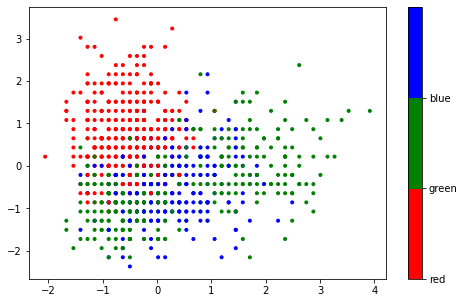

In [51]:
COLORS = ['red','green','blue']
                   
fig = plt.figure(figsize=(8,5))

plt.scatter(X[:, 0], X[:, 1], c=list(Y.sum(1)),
           cmap=matplotlib.colors.ListedColormap(COLORS),
           marker='.')

cb = plt.colorbar()
loc = np.arange(0,max(Y.sum(1)),max(Y.sum(1))/float(len(COLORS)))
cb.set_ticks(loc)
cb.set_ticklabels(COLORS)

#### Normalizacion de datos

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X[1]

array([-0.50171772, -0.85853807,  0.712711  ])

#### Division del conjunto de entrenamiento

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, 
                                                    random_state=42)

#### Seleccion de Algoritmo

In [54]:
from sklearn.svm import SVC

svc_model = SVC(kernel='linear')
svc_model = svc_model.fit(X_train, y_train)

#### Validacion

In [55]:
from sklearn.metrics import precision_recall_fscore_support

y_pred = svc_model.predict(X_test)

prec, reca, f1, _ = precision_recall_fscore_support(y_test, y_pred,
                                                    average='macro',
                                                    zero_division=1)
reca

0.42093061765192913

#### Hiperparametros

In [56]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear','poly', 'rbf'), 'C':[1, 10]}

clf = GridSearchCV(SVC(), parameters, cv=5)
clf = clf.fit(X_train, y_train)
results = pd.DataFrame(clf.cv_results_)

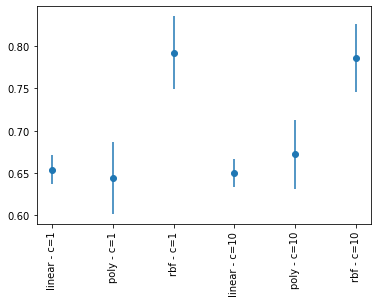

In [57]:
mean_score = results['mean_test_score']
std_score = results['std_test_score']
kernels = results['param_kernel']
param_c = results['param_C']

plt.errorbar(range(mean_score.shape[0]), mean_score, 
             yerr=std_score, marker='o', linestyle='')
labelparam = ['{} - c={}'.format(a, b)for a, b in zip(kernels.values, param_c.values)]
plt.xticks(range(len(labelparam)), labelparam, rotation=90)
plt.show()

#### Metricas

In [58]:
print(clf.best_estimator_, clf.best_estimator_.kernel)

SVC(C=1) rbf


In [59]:
y_pred = clf.best_estimator_.predict(X_test)
prec, reca, f1, _ = precision_recall_fscore_support(y_test, y_pred,
                                                    average='macro')
f1

0.6503731732645648

In [60]:
from utils import plot_cm

In [61]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, normalize='true')

<AxesSubplot:title={'center':'CM'}>

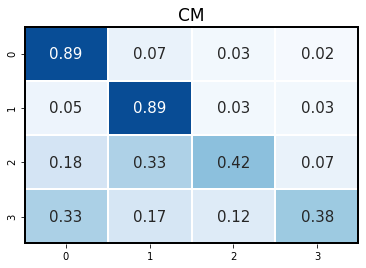

In [62]:
fig, axes = plt.subplots(1,1)
plot_cm(cm, axes)